In [44]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import mysql.connector

# Connect to the database 'swigy' in mysql server

**The database contains following tables :**

delivery_partner (partner_id, partner_name) 

food(f_id, f_name, type) 

menu(menu_id, r_id, fid, price) 

orders (order_id, user_id, r_id, amount, date, partner_id, delivery_time, delivery_rating, restaurant_rating) 

order_details (id, order_id, f_id) 

restaurants (r_id, r_name, cuisine) 

users(user_id, name, email, password)

In [4]:
try:
    db = mysql.connector.connect(host='localhost', user ='root', password="", database='swigy',port = 3307)
    cur = db.cursor()
    print("Connected to the database successfully.")
except mysql.connector.Error as err:
       print(f"Error: Could not connect to the database. {err}")

Connected to the database successfully.


# 1. How many customers have not placed any orders?

In [9]:
query = """select name from users
where user_id not in (
    select distinct user_id from orders
    where user_id is not null
);"""

cur.execute(query)
data = cur.fetchall()
data

[('Anupama',), ('Rishabh',)]

# 2. What is the average price of each food items ?

In [11]:
query = """select f.f_name , avg(price) from 
           menu m join  food f on m.f_id = f.f_id
           group by m.f_id ;"""

cur.execute(query)
data = cur.fetchall()
data

[('Non-veg Pizza', Decimal('450.0000')),
 ('Veg Pizza', Decimal('400.0000')),
 ('Choco Lava cake', Decimal('98.3333')),
 ('Chicken Wings', Decimal('230.0000')),
 ('Chicken Popcorn', Decimal('300.0000')),
 ('Rice Meal', Decimal('213.3333')),
 ('Roti meal', Decimal('140.0000')),
 ('Masala Dosa', Decimal('180.0000')),
 ('Rava Idli', Decimal('120.0000')),
 ('Schezwan Noodles', Decimal('220.0000')),
 ('Veg Manchurian', Decimal('180.0000'))]

In [12]:
# Convert the list to a DataFrame
df = pd.DataFrame(data, columns=['food_items', 'avg_price'])
df

,food_items,avg_price
0,Non-veg Pizza,450.0000
1,Veg Pizza,400.0000
2,Choco Lava cake,98.3333
3,Chicken Wings,230.0000
4,Chicken Popcorn,300.0000
5,Rice Meal,213.3333
6,Roti meal,140.0000
7,Masala Dosa,180.0000
8,Rava Idli,120.0000
9,Schezwan Noodles,220.0000


Text(0.5, 1.0, 'Average Price of Food Items')

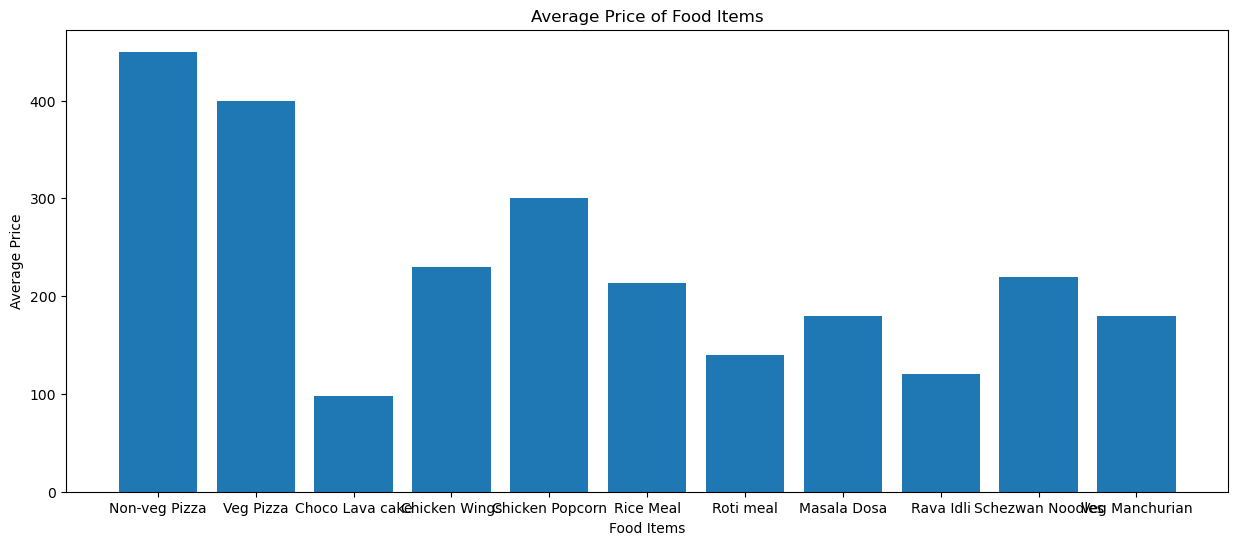

In [13]:
# Create a bar plot
plt.figure(figsize=(15, 6))
plt.bar(df['food_items'], df['avg_price'])

# Adding labels and title
plt.xlabel('Food Items')
plt.ylabel('Average Price')
plt.title('Average Price of Food Items')

 # 3. What is the average price of food for each restaurant?

In [15]:
query = """SELECT r.r_name, f.f_name, AVG(m.price) AS avg_price
        FROM menu m
        JOIN restaurants r ON m.r_id = r.r_id
        JOIN food f ON m.f_id = f.f_id
        GROUP BY r.r_name, f.f_name;
        """

cur.execute(query)
data = cur.fetchall()
data

[('box8', 'Choco Lava cake', Decimal('80.0000')),
 ('box8', 'Rice Meal', Decimal('160.0000')),
 ('box8', 'Roti meal', Decimal('140.0000')),
 ('China Town', 'Rice Meal', Decimal('250.0000')),
 ('China Town', 'Schezwan Noodles', Decimal('220.0000')),
 ('China Town', 'Veg Manchurian', Decimal('180.0000')),
 ('dominos', 'Choco Lava cake', Decimal('100.0000')),
 ('dominos', 'Non-veg Pizza', Decimal('450.0000')),
 ('dominos', 'Veg Pizza', Decimal('400.0000')),
 ('Dosa Plaza', 'Masala Dosa', Decimal('180.0000')),
 ('Dosa Plaza', 'Rava Idli', Decimal('120.0000')),
 ('Dosa Plaza', 'Rice Meal', Decimal('230.0000')),
 ('kfc', 'Chicken Popcorn', Decimal('300.0000')),
 ('kfc', 'Chicken Wings', Decimal('230.0000')),
 ('kfc', 'Choco Lava cake', Decimal('115.0000'))]

# 4. Find the top restaurant in terms of the number of orders for all months

In [64]:
#number of product order in each moth (product_name , month, number of order)
query = """select r.r_name , SUBSTRING(date, 4, 2) AS month, count(o.order_id) as total_order 
           from orders o
           join restaurants r on o.r_id = r.r_id
           group by month, o.r_id
           order by month desc, total_order desc  ;"""

cur.execute(query)
data = cur.fetchall()
data

[('kfc', '07', 3),
 ('dominos', '07', 2),
 ('China Town', '07', 2),
 ('box8', '07', 2),
 ('Dosa Plaza', '07', 1),
 ('kfc', '06', 3),
 ('box8', '06', 2),
 ('dominos', '06', 1),
 ('Dosa Plaza', '06', 1),
 ('China Town', '06', 1),
 ('Dosa Plaza', '05', 3),
 ('dominos', '05', 2),
 ('kfc', '05', 2)]

In [66]:
df = pd.DataFrame(data, columns = ['restaurants', 'month', 'order_count'])
df

,restaurants,month,order_count
0,kfc,07,3
1,dominos,07,2
2,China Town,07,2
3,box8,07,2
4,Dosa Plaza,07,1
5,kfc,06,3
6,box8,06,2
7,dominos,06,1
8,Dosa Plaza,06,1
9,China Town,06,1


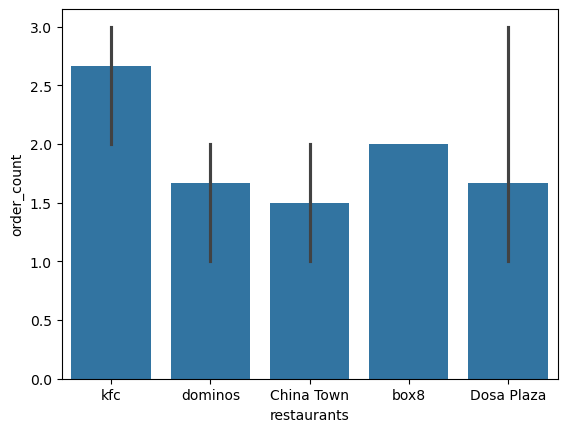

In [68]:
# Create the barplot
sns.barplot(x='restaurants', y='order_count', data=df)

# Show the plot
plt.show()


In [72]:
# maximum order in each month
query = """with res as (select r.r_name , SUBSTRING(date, 4, 2) AS month, count(o.order_id) as total_order 
           from orders o
           join restaurants r on o.r_id = r.r_id
           group by month, o.r_id
           order by month desc, total_order desc)  
           select r_name,month, max(total_order) from res 
           group by month;"""

cur.execute(query)
data = cur.fetchall()
data

[('Dosa Plaza', '05', 3), ('kfc', '06', 3), ('kfc', '07', 3)]

In [76]:
df = pd.DataFrame(data, columns = ['restaurants', 'month', 'order_count'])
df

,restaurants,month,order_count
0,Dosa Plaza,05,3
1,kfc,06,3
2,kfc,07,3


# 5. Find the top restaurant in terms of the number of orders for the month of June

In [86]:
query = """with res as (select r.r_name , SUBSTRING(date, 4, 2) AS month, count(o.order_id) as total_order 
           from orders o
           join restaurants r on o.r_id = r.r_id
           group by month, o.r_id
           order by month desc, total_order desc  )
           select r_name, total_order from res
           where month = '06' limit 1;"""

cur.execute(query)
data = cur.fetchall()
data

[('kfc', 3)]

# 6. Restaurants with monthly revenue greater than 500.

In [122]:
#total revenue of each restaurant in each month
query = """with res as (select r.r_name, SUBSTRING(date, 4, 2) AS month, sum(o.amount) as revenu 
           from orders o 
           join restaurants r on o.r_id = r.r_id 
           group by o.r_id , month)
           select r_name , month, revenu from res where revenu > 500;"""
cur.execute(query)
data = cur.fetchall()
data

[('dominos', '05', Decimal('1000')),
 ('dominos', '06', Decimal('950')),
 ('dominos', '07', Decimal('1100')),
 ('kfc', '05', Decimal('645')),
 ('kfc', '06', Decimal('990')),
 ('kfc', '07', Decimal('1935')),
 ('Dosa Plaza', '05', Decimal('780')),
 ('China Town', '07', Decimal('1050'))]

In [100]:
query = """with res as (select r.r_name, SUBSTRING(date, 4, 2) AS month, sum(o.amount) as revenu 
           from orders o 
           join restaurants r on o.r_id = r.r_id 
           group by o.r_id , month)
           select distinct r_name from res where revenu > 500;"""
cur.execute(query)
data = cur.fetchall()
data

[('dominos',), ('kfc',), ('Dosa Plaza',), ('China Town',)]

In [124]:
query = """with res as (select r.r_name, SUBSTRING(date, 4, 2) AS month, sum(o.amount) as revenu 
           from orders o 
           join restaurants r on o.r_id = r.r_id 
           group by o.r_id , month),
           
           res_1 as (select r_name , avg(revenu) as avg_rev from res 
           group by r_name)
          
           select r_name, avg_rev from res_1 where avg_rev > 500;"""
cur.execute(query)
data = cur.fetchall()
data

[('China Town', Decimal('725.0000')),
 ('dominos', Decimal('1016.6667')),
 ('kfc', Decimal('1190.0000'))]

# 7. Show all orders with order details for a particular customer in a particular date range (15th May 2022 to 15th June 2022)

In [213]:
def query_for_previous_orders(customer_id, starting_date, ending_date):
    query = """
    SELECT u.user_id, u.name, o.order_id,f.f_name,r.r_name, o.date, o.amount,o.partner_id,o.delivery_time
    FROM users u 
    INNER JOIN orders o ON u.user_id = o.user_id
    INNER JOIN order_details od ON o.order_id = od.order_id
    INNER JOIN food f on f.f_id = od.f_id
    INNER JOIN restaurants r on r.r_id =o.r_id
    WHERE u.user_id = %s 
    AND o.date BETWEEN %s AND %s;
    """
    
    cur.execute(query, (customer_id, starting_date, ending_date))
    data = cur.fetchall()
    df = pd.DataFrame(data, columns = ["user_id", "name", "order_id", "f_name", "r_name", "date", "amount", "partner_id", "delivery_time"])
    return df

# Example usage
df = query_for_previous_orders(1, '15-05-2022', '15-06-2022')
print(df)


   user_id    name  order_id           f_name r_name        date  amount  \
0        1  Nitish      1003        Rice Meal   box8  15-06-2022     240   
1        1  Nitish      1003  Choco Lava cake   box8  15-06-2022     240   

   partner_id  delivery_time  
0           5             29  
1           5             29  


In [215]:
#order details of user_id = 4
customer_id = int(input("customer_id  "))
starting_date = input("Starting_date   ")
ending_date = input("Ending_date   ")
data = query_for_previous_orders(customer_id, starting_date, ending_date)
#data = query_for_previous_orders(4, '15-05-2022', '15-06-2022')
print(data)

customer_id   4
Starting_date    15-05-2022
Ending_date    15-06-2022


   user_id   name  order_id            f_name      r_name        date  amount  \
0        4  Ankit      1016       Masala Dosa  Dosa Plaza  15-05-2022     300   
1        4  Ankit      1016         Rava Idli  Dosa Plaza  15-05-2022     300   
2        4  Ankit      1018  Schezwan Noodles  Dosa Plaza  15-06-2022     400   
3        4  Ankit      1018    Veg Manchurian  Dosa Plaza  15-06-2022     400   

   partner_id  delivery_time  
0           3             31  
1           3             31  
2           2             40  
3           2             40  


In [209]:
query =  """SELECT u.user_id, u.name, o.order_id,f.f_name,r.r_name, o.date, o.amount,o.partner_id,o.delivery_time
            FROM users u
            INNER JOIN orders o ON u.user_id = o.user_id
            INNER JOIN order_details od ON o.order_id = od.order_id
            INNER JOIN food f on f.f_id = od.f_id
            INNER JOIN restaurants r on r.r_id =o.r_id
            WHERE u.user_id = 1;
            """

cur.execute(query)
data = cur.fetchall()
data

[(1, 'Nitish', 1001, 'Non-veg Pizza', 'dominos', '10-05-2022', 550, 1, 25),
 (1, 'Nitish', 1001, 'Choco Lava cake', 'dominos', '10-05-2022', 550, 1, 25),
 (1, 'Nitish', 1002, 'Chicken Wings', 'kfc', '26-05-2022', 415, 1, 19),
 (1, 'Nitish', 1002, 'Choco Lava cake', 'kfc', '26-05-2022', 415, 1, 19),
 (1, 'Nitish', 1003, 'Rice Meal', 'box8', '15-06-2022', 240, 5, 29),
 (1, 'Nitish', 1003, 'Choco Lava cake', 'box8', '15-06-2022', 240, 5, 29),
 (1, 'Nitish', 1004, 'Rice Meal', 'box8', '29-06-2022', 240, 4, 42),
 (1, 'Nitish', 1004, 'Choco Lava cake', 'box8', '29-06-2022', 240, 4, 42),
 (1, 'Nitish', 1005, 'Roti meal', 'box8', '10-07-2022', 220, 1, 58),
 (1, 'Nitish', 1005, 'Choco Lava cake', 'box8', '10-07-2022', 220, 1, 58)]

# 8. Which restaurant has the highest number of repeat customers?

In [242]:
query = """with temp as (select user_id, r_name, count(user_id) no_of_orders from
           orders o inner join 
           restaurants r on o.r_id = r.r_id
           group by r_name,user_id)
           
           select r_name ,count(user_id) as no_of_repeat_cust from temp
           where no_of_orders>1 
           group by r_name
           order by no_of_repeat_cust desc limit 1;
        """
cur.execute(query)
data = cur.fetchall()
data

[('kfc', 2)]

# 9. Month over month revenue growth of swiggy

In [261]:
query = """with temp as (select SUBSTRING(o.date, 4, 2) AS month , o.order_id, o.r_id, od.f_id from
           order_details od 
           inner join orders o on od.order_id = o.order_id)

           select t.month , sum(m.price) from 
           temp t
           inner join menu m on t.r_id = m.r_id and t.f_id = m.f_id
           group by month
           """

cur.execute(query)
data = cur.fetchall()
data

[('05', Decimal('2355')), ('06', Decimal('2635')), ('07', Decimal('4845'))]

# 10. Find the top 3 most ordered dish

In [284]:
query = """
        select  f.f_name , count(od.id) as no_of_orders from 
        food f
        inner join order_details od on  f.f_id = od.f_id
        group by f.f_id
        order by no_of_orders desc limit 3;
        """
cur.execute(query)
data = cur.fetchall()
data

[('Choco Lava cake', 13), ('Chicken Wings', 8), ('Non-veg Pizza', 5)]

# 11. Month over month revenue growth of each restaurant.

In [299]:
query = """with temp as (select SUBSTRING(o.date, 4, 2) AS month , o.order_id, o.r_id, od.f_id from
           order_details od 
           inner join orders o on od.order_id = o.order_id),

           temp2 as (select t.month , t.r_id , sum(m.price) as revenue from 
           temp t
           inner join menu m on t.r_id = m.r_id and t.f_id = m.f_id
           group by month , t.r_id)

           select t.month, r.r_id, r.r_name, t.revenue from
           temp2 t
           inner join restaurants r on t.r_id = r.r_id
           order by t.month asc;
           """

cur.execute(query)
data = cur.fetchall()
data

[('05', 2, 'kfc', Decimal('575')),
 ('05', 4, 'Dosa Plaza', Decimal('780')),
 ('05', 1, 'dominos', Decimal('1000')),
 ('06', 2, 'kfc', Decimal('805')),
 ('06', 1, 'dominos', Decimal('950')),
 ('06', 3, 'box8', Decimal('480')),
 ('06', 5, 'China Town', Decimal('400')),
 ('07', 1, 'dominos', Decimal('1100')),
 ('07', 4, 'Dosa Plaza', Decimal('300')),
 ('07', 3, 'box8', Decimal('460')),
 ('07', 5, 'China Town', Decimal('1050')),
 ('07', 2, 'kfc', Decimal('1935'))]

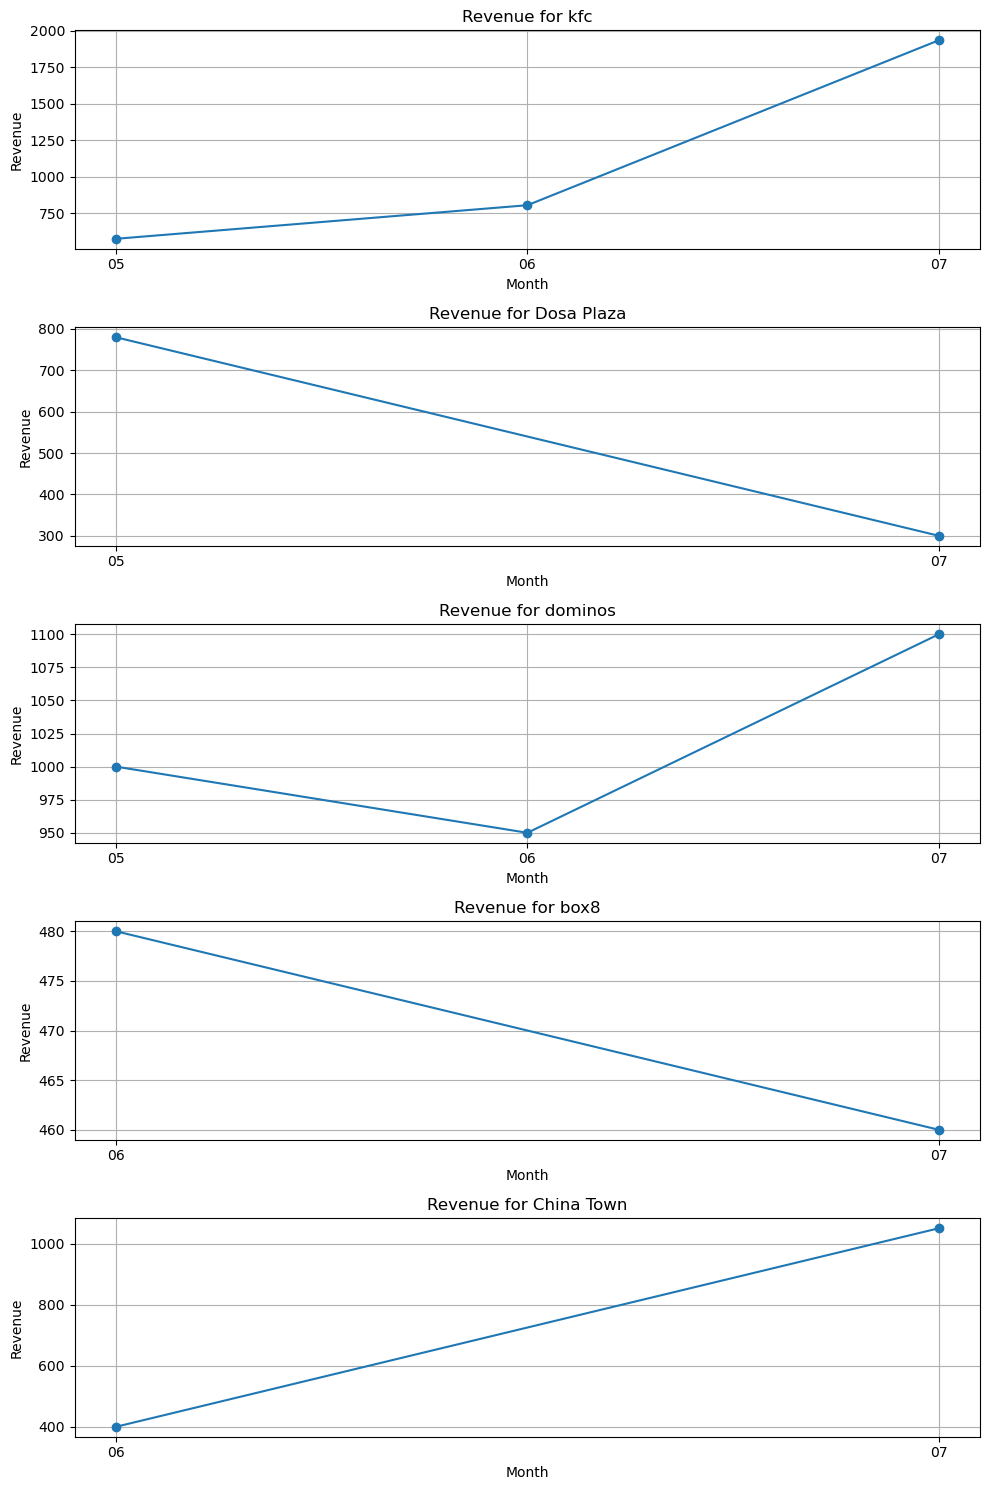

In [301]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating DataFrame
df = pd.DataFrame(data, columns=['month', 'r_id', 'r_name', 'revenue'])

# Get the unique restaurant names
restaurants = df['r_name'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=len(restaurants), ncols=1, figsize=(10, 15))

# Plot each restaurant in its own subplot
for i, restaurant in enumerate(restaurants):
    restaurant_data = df[df['r_name'] == restaurant]
    axes[i].plot(restaurant_data['month'], restaurant_data['revenue'], marker='o')
    axes[i].set_title(f'Revenue for {restaurant}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Revenue')
    axes[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


# 12. What is the overall revenue generated by the platform during a specific time period?

In [312]:
def revenue(starting_date, ending_date):
    query = """
    select sum(amount) as revenue from orders
    where date between %s and %s;
    """
    
    cur.execute(query, (starting_date, ending_date))
    data = cur.fetchall()
    return data

In [320]:
#Example
starting_date = input("Enter the starting date    ")
ending_date = input("Enter the ending date    ")

print(f"Total revenue between  {starting_date}  and  {ending_date}  is  ",revenue(starting_date, ending_date))


Enter the starting date     15-05-2022
Enter the ending date     15-06-2022


Total revenue between  15-05-2022  and  15-06-2022  is   [(Decimal('940'),)]


# 13. What is the average order value per user?

In [327]:
query = """
        select u.name, avg(o.amount) from
        orders o 
        inner join users u on o.user_id = u.user_id
        group by o.user_id
        """

cur.execute(query)
data = cur.fetchall()
data

[('Nitish', Decimal('333.0000')),
 ('Khushboo', Decimal('534.0000')),
 ('Vartika', Decimal('264.0000')),
 ('Ankit', Decimal('360.0000')),
 ('Neha', Decimal('607.0000'))]

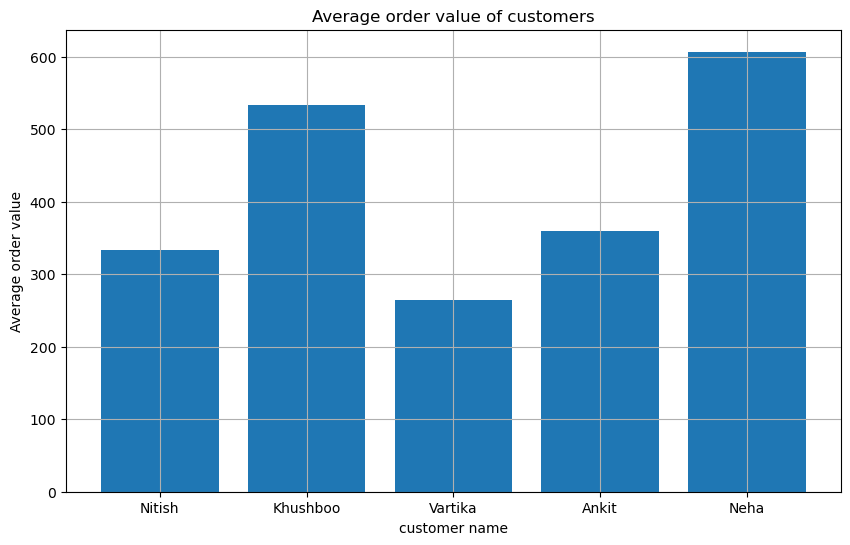

In [341]:
df = pd.DataFrame(data, columns=['Name', 'Avg_order_value'])
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(df['Name'], df['Avg_order_value'])


# Adding labels and title
plt.grid()
plt.xlabel('customer name')
plt.ylabel('Average order value')
plt.title('Average order value of customers')
plt.show()

# 14. What is the average delivery time for each restaurant, and how does it affect customer satisfaction?

In [344]:
query =  """select r.r_name, round(avg(o.delivery_time),2) as avg_delivery_time, round(avg(o.delivery_rating),2) as avg_delivery_rating
            from orders o
            join restaurants r on o.r_id = r.r_id
            group by r.r_name;"""

cur.execute(query)
data = cur.fetchall()
data

[('box8', Decimal('40.50'), Decimal('3.00')),
 ('China Town', Decimal('54.33'), Decimal('2.67')),
 ('dominos', Decimal('24.40'), Decimal('4.00')),
 ('Dosa Plaza', Decimal('39.00'), Decimal('2.80')),
 ('kfc', Decimal('42.50'), Decimal('3.25'))]

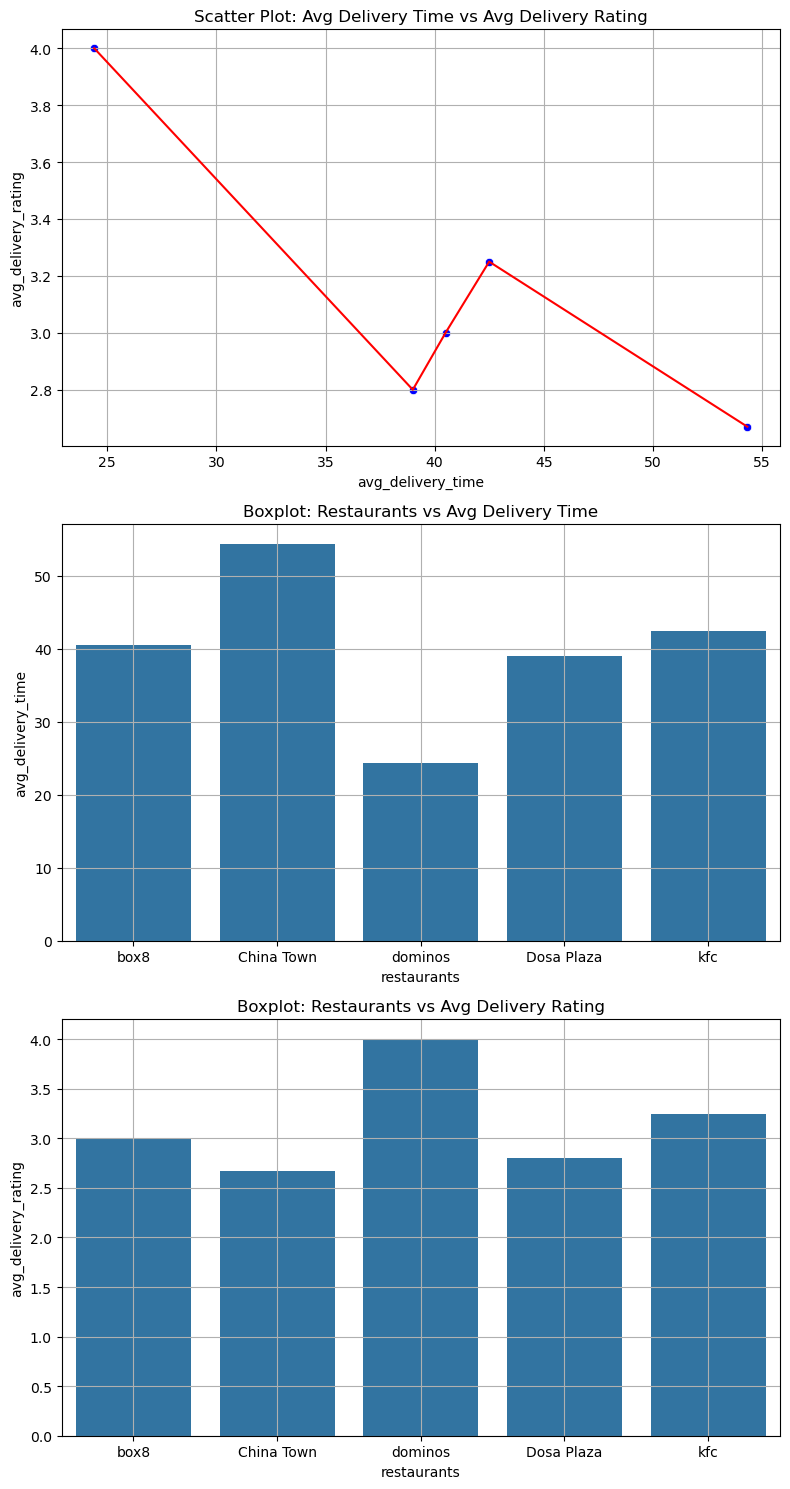

In [382]:
df = pd.DataFrame(data, columns = ["restaurants", "avg_delivery_time", "avg_delivery_rating"])


# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 15))

# Scatter plot between avg_delivery_time and avg_delivery_rating
sns.lineplot(x='avg_delivery_time', y='avg_delivery_rating', color='r',data=df, ax=axes[0])
sns.scatterplot(x='avg_delivery_time', y='avg_delivery_rating', data=df, ax=axes[0],color='blue')
axes[0].set_title('Scatter Plot: Avg Delivery Time vs Avg Delivery Rating')
axes[0].grid(True)

# Boxplot between restaurant and avg_delivery_time
sns.barplot(x='restaurants', y='avg_delivery_time', data=df, ax=axes[1])
axes[1].set_title('Boxplot: Restaurants vs Avg Delivery Time')
axes[1].grid(True)

# Boxplot between restaurant and avg_delivery_rating
sns.barplot(x='restaurants', y='avg_delivery_rating', data=df, ax=axes[2])
axes[2].set_title('Boxplot: Restaurants vs Avg Delivery Rating')
axes[2].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


# 15. What is the average rating for each restaurant and delivery partner?

In [389]:
# Average restaurant ratings
query = """
        select r_name, avg(restaurant_rating) as avg_rating from
        orders o
        inner join restaurants r on o.r_id = r.r_id
        group by o.r_id;
        """

cur.execute(query)
data = cur.fetchall()
data

[('dominos', 1.0),
 ('kfc', 1.375),
 ('box8', 3.5),
 ('Dosa Plaza', 2.2),
 ('China Town', 3.6666666666666665)]

In [391]:
# Average delivery partner ratings
query = """
        select dp.partner_name, round(avg(o.delivery_rating),2) as avg_delivery_rating
        from orders o
        join delivery_partner dp on o.partner_id = dp.partner_id
        group by dp.partner_name;
        """

cur.execute(query)
data = cur.fetchall()
data

[('Amit', Decimal('3.00')),
 ('Gyandeep', Decimal('3.50')),
 ('Kartik', Decimal('3.00')),
 ('Lokesh', Decimal('4.00')),
 ('Suresh', Decimal('2.86'))]

# 16. How do the ratings for restaurants and delivery partners correlate with customer retention?

In [396]:
query = """WITH group_1 AS (
    SELECT 
        r.r_name, 
        COUNT(DISTINCT o.user_id) AS unique_users, 
        AVG(o.restaurant_rating) AS avg_restaurant_rating
    FROM orders o
    JOIN restaurants r ON o.r_id = r.r_id
    GROUP BY r.r_name
), 
group_2 AS (
    SELECT 
        dp.partner_name, 
        COUNT(DISTINCT o.user_id) AS unique_users, 
        AVG(o.delivery_rating) AS avg_delivery_rating
    FROM orders o
    JOIN delivery_partner dp ON o.partner_id = dp.partner_id
    GROUP BY dp.partner_name
),
joined_data AS (
    SELECT 
        g1.avg_restaurant_rating,
        g2.avg_delivery_rating
    FROM group_1 g1
    INNER JOIN group_2 g2 ON g1.unique_users = g2.unique_users
),
stats AS (
    SELECT
        SUM(avg_restaurant_rating) AS sum_x,
        SUM(avg_delivery_rating) AS sum_y,
        SUM(avg_restaurant_rating * avg_delivery_rating) AS sum_xy,
        SUM(avg_restaurant_rating * avg_restaurant_rating) AS sum_x2,
        SUM(avg_delivery_rating * avg_delivery_rating) AS sum_y2,
        COUNT(*) AS n
    FROM joined_data
)
SELECT 
    (n * sum_xy - sum_x * sum_y) / 
    (SQRT(n * sum_x2 - sum_x * sum_x) * SQRT(n * sum_y2 - sum_y * sum_y)) AS correlation
FROM stats;"""

cur.execute(query)
data = cur.fetchall()
data

[(0.6811298481980357,)]

# 17.  Which days and times see the highest order volume ?

In [24]:
query = """select date , count(order_id) as no_of_orders from 
           orders 
           group by date
           order by no_of_orders desc limit 5;
        """

cur.execute(query)
data = cur.fetchall()
print("Top 5 order volume of a date : ")
data

Top 5 order volume of a date : 


[('10-05-2022', 2),
 ('15-07-2022', 2),
 ('30-05-2022', 2),
 ('15-06-2022', 2),
 ('15-05-2022', 1)]

# 18. How many orders were delivered by each delivery partner and what is their average delivery rating?

In [8]:
query =  """
         select dp.partner_name, count(o.order_id) as number_of_delivery, avg(o.delivery_rating) as avg_rating from
         orders o
         inner join delivery_partner dp on o.partner_id = dp.partner_id
         group by o.partner_id;
         """
cur.execute(query)
data = cur.fetchall()
data

[('Suresh', 7, Decimal('2.8571')),
 ('Amit', 6, Decimal('3.0000')),
 ('Lokesh', 4, Decimal('4.0000')),
 ('Kartik', 4, Decimal('3.0000')),
 ('Gyandeep', 4, Decimal('3.5000'))]

In [10]:
df = pd.DataFrame(data, columns = ["partner_name", "no_of_delivery", "avg_rating"])
df

,partner_name,no_of_delivery,avg_rating
0,Suresh,7,2.8571
1,Amit,6,3.0000
2,Lokesh,4,4.0000
3,Kartik,4,3.0000
4,Gyandeep,4,3.5000


# 19. What is the distribution of delivery among the Delivery_Partner ?

In [407]:
query =  """
         select dp.partner_name, count(o.order_id) as number_of_delivery from
         orders o
         inner join delivery_partner dp on o.partner_id = dp.partner_id
         group by o.partner_id;
         """
cur.execute(query)
data = cur.fetchall()
data

[('Suresh', 7), ('Amit', 6), ('Lokesh', 4), ('Kartik', 4), ('Gyandeep', 4)]